<a href="https://colab.research.google.com/github/jamesee/colab-notebooks/blob/master/LogisticRegressionClassifier-PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))


number of training samples: 60000
number of testing samples: 10000


In [4]:

print("datatype of the 1st training sample: ", train_dataset[0][0].type())
print("size of the 1st training sample: ", train_dataset[0][0].size())

datatype of the 1st training sample:  torch.FloatTensor
size of the 1st training sample:  torch.Size([1, 28, 28])


In [5]:
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

label of the first taining sample:  5
label of the second taining sample:  0


In [6]:
import matplotlib.pyplot as plt


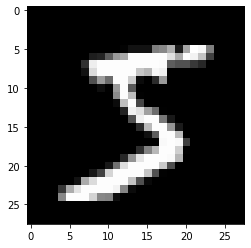

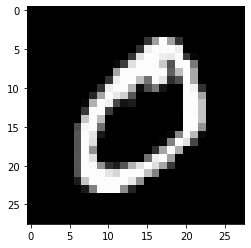

In [7]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [8]:

from torch.utils.data import DataLoader
 
# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [9]:
# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [10]:

# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [ ]:

# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.206225633621216. Accuracy: 61.87
Epoch: 1. Loss: 2.095405101776123. Accuracy: 72.3
Epoch: 2. Loss: 2.054096221923828. Accuracy: 76.76
Epoch: 3. Loss: 2.01193904876709. Accuracy: 78.84
Epoch: 4. Loss: 1.9837908744812012. Accuracy: 80.12
Epoch: 5. Loss: 1.9047961235046387. Accuracy: 80.98
Epoch: 6. Loss: 1.8886303901672363. Accuracy: 81.49
Epoch: 7. Loss: 1.9112401008605957. Accuracy: 81.99
Epoch: 8. Loss: 1.9292489290237427. Accuracy: 82.31
Epoch: 9. Loss: 1.8379093408584595. Accuracy: 82.63
Epoch: 10. Loss: 1.7998292446136475. Accuracy: 82.95
Epoch: 11. Loss: 1.8031320571899414. Accuracy: 83.38
Epoch: 12. Loss: 1.798622965812683. Accuracy: 83.57
Epoch: 13. Loss: 1.8222333192825317. Accuracy: 83.72
Epoch: 14. Loss: 1.8833749294281006. Accuracy: 83.85
Epoch: 15. Loss: 1.7807834148406982. Accuracy: 84.09
Epoch: 16. Loss: 1.7708855867385864. Accuracy: 84.24
Epoch: 17. Loss: 1.7456341981887817. Accuracy: 84.39
Epoch: 18. Loss: 1.763911247253418. Accuracy: 84.52
Epoch: 19. 

In [ ]:

plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

In [ ]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()